# This notebook checks if that blurring to many locations is the same as blurring to just a subset of those locations.

In [1]:
import supereeg as se
import numpy as np

In [2]:
locs = np.array([[-61., -77.,  -3.],
                 [-41., -77., -23.],
                 [-21., -97.,  17.],
                 [-21., -37.,  77.],
                 [-21.,  63.,  -3.],
                 [ -1., -37.,  37.],
                 [ -1.,  23.,  17.],
                 [ 19., -57., -23.],
                 [ 19.,  23.,  -3.],
                 [ 39., -57.,  17.]])

### make brain object with first 4 locations, then slice it to exclude the first location 

In [3]:
bo_locs_inds = [0,1,2,3]
sub_locs_inds = [1,2,3]
bo_locs = locs[bo_locs_inds]
sub_locs = locs[sub_locs_inds]

In [4]:
bo = se.simulate_bo(n_samples=100, sample_rate=10, cov='toeplitz', locs=bo_locs, noise =.3)

In [5]:
bo.get_locs()

,x,y,z
0,-61.0,-77.0,-3.0
1,-41.0,-77.0,-23.0
2,-21.0,-97.0,17.0
3,-21.0,-37.0,77.0


In [6]:
# index brain object to get sample patient
bo_sample = bo[: ,sub_locs_inds]

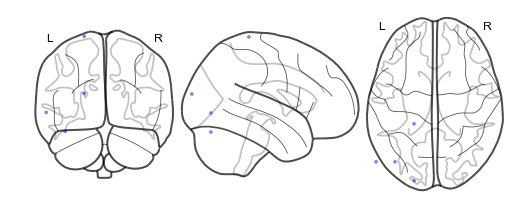

In [7]:
bo.plot_locs()

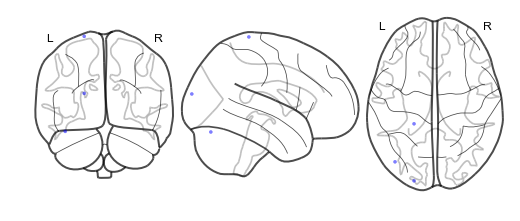

In [8]:
bo_sample.plot_locs()

### blur to either 4 locations or all 10 locations

In [9]:
full_model = se.Model(bo_sample, locs=locs)

In [10]:
small_model = se.Model(bo_sample, locs=bo_locs)

### predict at that first locations

In [11]:
bo_r_full = full_model.predict(bo_sample)

In [12]:
bo_r_small = small_model.predict(bo_sample)

In [13]:
bo_r_full.label

['reconstr',
 'observed',
 'observed',
 'observed',
 'reconstr',
 'reconstr',
 'reconstr',
 'reconstr',
 'reconstr',
 'reconstr']

In [14]:
bo_r_small.label

['reconstr', 'observed', 'observed', 'observed']

In [15]:
bo_t_f = bo_r_full[:,0]

In [16]:
bo_t_s = bo_r_small[:,0]

### check that predictions are the same, and they are!

In [17]:
np.allclose(bo_t_s.get_data().as_matrix(),bo_t_f.get_data().as_matrix())

True